## Airbnb NYC Case Study 

#### Problem Statement:
- Suppose that you are working as a data analyst at Airbnb. For the past few months, Airbnb has seen a major decline in revenue. - Now that the restrictions have started lifting and people have started to travel more, Airbnb wants to make sure that it is fully prepared for this change.

#### Objective:
- To prepare for the next best steps that Airbnb needs to take as a business, you have been asked to analyse a dataset consisting of various Airbnb listings in New York.


### Importing necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading the data:

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


### Data Understanding:

In [3]:
#Checking null values:
round((df.isnull().sum()/len(df))*100,2)

id                                 0.00
name                               0.03
host_id                            0.00
host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.56
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

In [4]:
#Removing the rows which contains null values from host_name and name:

df = df[~(df['name'].isnull() | df['host_name'].isnull())]

In [5]:
#Checking shape:
df.shape

(48858, 16)

In [6]:
#Checking info:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-null  int64  
 12  last_review                     

In [7]:
#Checking unique values:
df.nunique().sort_values(ascending=False)

id                                48858
name                              47875
host_id                           37425
latitude                          19039
longitude                         14716
host_name                         11450
last_review                        1764
reviews_per_month                   937
price                               674
number_of_reviews                   394
availability_365                    366
neighbourhood                       221
minimum_nights                      108
calculated_host_listings_count       47
neighbourhood_group                   5
room_type                             3
dtype: int64

In [8]:
#Checking the distribution of the data:
round(df.describe(),0)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48858.0,48858.0,48858.0,48858.0,48858.0,48858.0,48858.0,38821.0,48858.0,48858.0
mean,19023350.0,67631688.0,41.0,-74.0,153.0,7.0,23.0,1.0,7.0,113.0
std,10982894.0,78623889.0,0.0,0.0,240.0,20.0,45.0,2.0,33.0,132.0
min,2539.0,2438.0,40.0,-74.0,0.0,1.0,0.0,0.0,1.0,0.0
25%,9475980.0,7818669.0,41.0,-74.0,69.0,1.0,1.0,0.0,1.0,0.0
50%,19691144.0,30791331.0,41.0,-74.0,106.0,3.0,5.0,1.0,1.0,45.0
75%,29157648.0,107434423.0,41.0,-74.0,175.0,5.0,24.0,2.0,2.0,227.0
max,36487245.0,274321313.0,41.0,-74.0,10000.0,1250.0,629.0,58.0,327.0,365.0


In [9]:
#Checking head of the data:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


#### Dropping columns which are less relevant in analysis:
- id
- name
- last_review

In [10]:
df.drop(['id','name'], axis=1, inplace=True)

In [11]:
#Checking head of the data:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [12]:
#Checking the reviews_per_month:
df['reviews_per_month'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: reviews_per_month, Length: 48858, dtype: float64>

#### There are null values in 'reviews_per_month' it is not missing at random because there are no reviews for these records there for it should be imputed with value 0.

In [13]:
#Imputing the reviews_per_month with 0:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

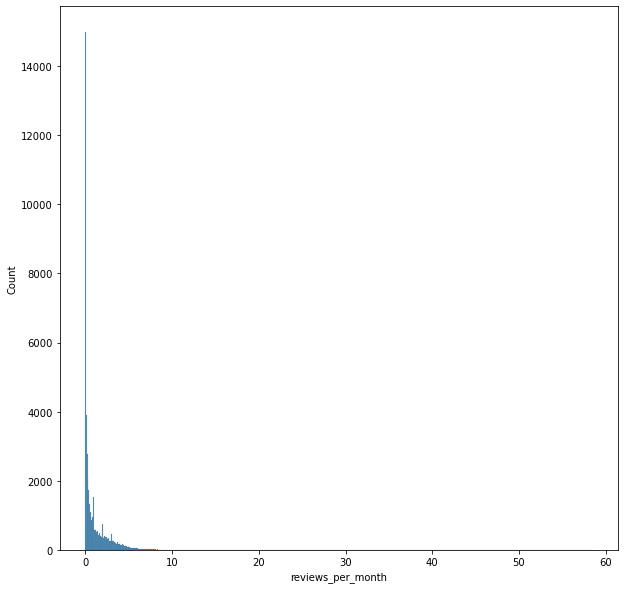

In [14]:
#Checking the distribtuion of reviews_per_month:
plt.figure(figsize=(10,10))
sns.histplot(df['reviews_per_month'])
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48858 non-null  int64  
 1   host_name                       48858 non-null  object 
 2   neighbourhood_group             48858 non-null  object 
 3   neighbourhood                   48858 non-null  object 
 4   latitude                        48858 non-null  float64
 5   longitude                       48858 non-null  float64
 6   room_type                       48858 non-null  object 
 7   price                           48858 non-null  int64  
 8   minimum_nights                  48858 non-null  int64  
 9   number_of_reviews               48858 non-null  int64  
 10  last_review                     38821 non-null  object 
 11  reviews_per_month               48858 non-null  float64
 12  calculated_host_listings_count  

In [16]:
#seperating all the categorical and continuous variables:
cat_cols = ['neighbourhood_group',
            'room_type']

cont_cols = ['price',
             'minimum_nights',
             'number_of_reviews',
             'reviews_per_month',
             'calculated_host_listings_count',
             'availability_365']

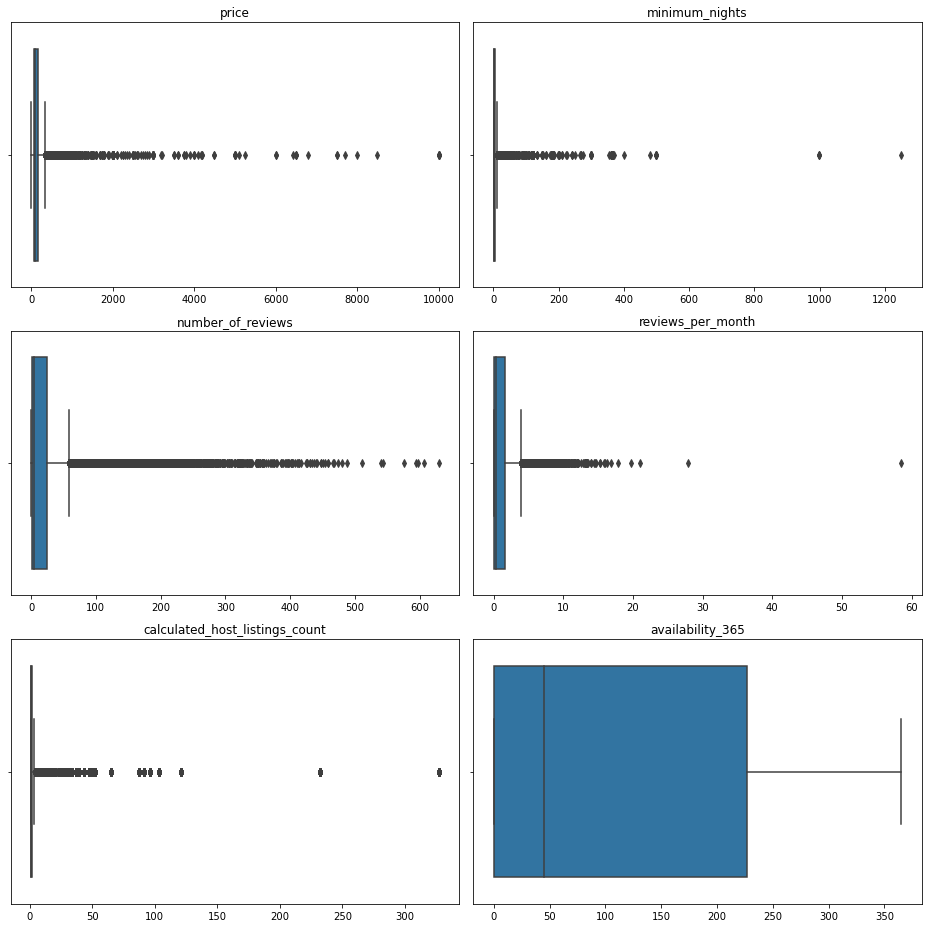

In [17]:
#plotting boxplots for all the continous columns:

plt.figure(figsize=([13,13]))

for i,col in enumerate(cont_cols):
    plt.subplot(3,2,i+1)
    sns.boxplot(df[col])
    plt.title(col)
    plt.xlabel("")
    plt.tight_layout()

In [18]:
#Outliers checking:
round(df.iloc[:,1:].describe(percentiles=[0.80,0.90,0.95,0.98,0.99]),1)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48858.0,48858.0,48858.0,48858.0,48858.0,48858.0,48858.0,48858.0
mean,40.7,-74.0,152.7,7.0,23.3,1.1,7.1,112.8
std,0.1,0.0,240.2,20.0,44.5,1.6,33.0,131.6
min,40.5,-74.2,0.0,1.0,0.0,0.0,1.0,0.0
50%,40.7,-74.0,106.0,3.0,5.0,0.4,1.0,45.0
80%,40.8,-73.9,200.0,6.0,33.0,2.0,3.0,272.0
90%,40.8,-73.9,269.0,28.0,70.0,3.2,5.0,337.0
95%,40.8,-73.9,355.0,30.0,114.0,4.3,15.0,359.0
98%,40.9,-73.8,550.0,30.0,172.0,5.6,91.0,365.0
99%,40.9,-73.8,799.0,45.0,214.0,6.8,232.0,365.0


Clearly we can see that value rises sharply after 99%tile. So we need to handle this.

In [19]:
# Outlier Handling:

# outlier treatment for price: 
Q1 = df['price'].quantile(0.10) 
Q3 = df['price'].quantile(0.90) 
IQR = Q3 - Q1  
df = df[(df['price'] >= Q1 - 1.5*IQR) & (df['price'] <= Q3 + 1.5*IQR)]

# outlier treatment for minimum_nights: 
Q1 = df['minimum_nights'].quantile(0.10) 
Q3 = df['minimum_nights'].quantile(0.90) 
IQR = Q3 - Q1  
df = df[(df['minimum_nights'] >= Q1 - 1.5*IQR) & (df['minimum_nights'] <= Q3 + 1.5*IQR)]

# outlier treatment for number_of_reviews: 
Q1 = df['number_of_reviews'].quantile(0.10) 
Q3 = df['number_of_reviews'].quantile(0.90) 
IQR = Q3 - Q1  
df = df[(df['number_of_reviews'] >= Q1 - 1.5*IQR) & (df['number_of_reviews'] <= Q3 + 1.5*IQR)]

# outlier treatment for reviews_per_month: 
Q1 = df['reviews_per_month'].quantile(0.10) 
Q3 = df['reviews_per_month'].quantile(0.90) 
IQR = Q3 - Q1  
df = df[(df['reviews_per_month'] >= Q1 - 1.5*IQR) & (df['reviews_per_month'] <= Q3 + 1.5*IQR)]

# outlier treatment for calculated_host_listings_count: 
Q1 = df['calculated_host_listings_count'].quantile(0.10) 
Q3 = df['calculated_host_listings_count'].quantile(0.90) 
IQR = Q3 - Q1  
df = df[(df['calculated_host_listings_count'] >= Q1 - 1.5*IQR) & (df['calculated_host_listings_count'] <= Q3 + 1.5*IQR)]

In [20]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.387700e+04,43877.000000,43877.000000,43877.000000,43877.000000,43877.000000,43877.000000,43877.000000,43877.000000
mean,6.570273e+07,40.728115,-73.950958,130.927046,4.942863,20.134307,1.036149,1.710737,99.130250
std,7.742387e+07,0.055682,0.046063,90.584430,7.606918,32.643546,1.398608,1.556270,125.385231
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.658248e+06,40.688800,-73.981680,68.000000,1.000000,1.000000,0.050000,1.000000,0.000000
50%,3.010134e+07,40.721190,-73.954390,100.000000,2.000000,5.000000,0.390000,1.000000,28.000000
75%,1.023730e+08,40.763580,-73.934830,167.000000,4.000000,23.000000,1.540000,2.000000,180.000000
max,2.743213e+08,40.913060,-73.712990,599.000000,68.000000,177.000000,7.720000,11.000000,365.000000


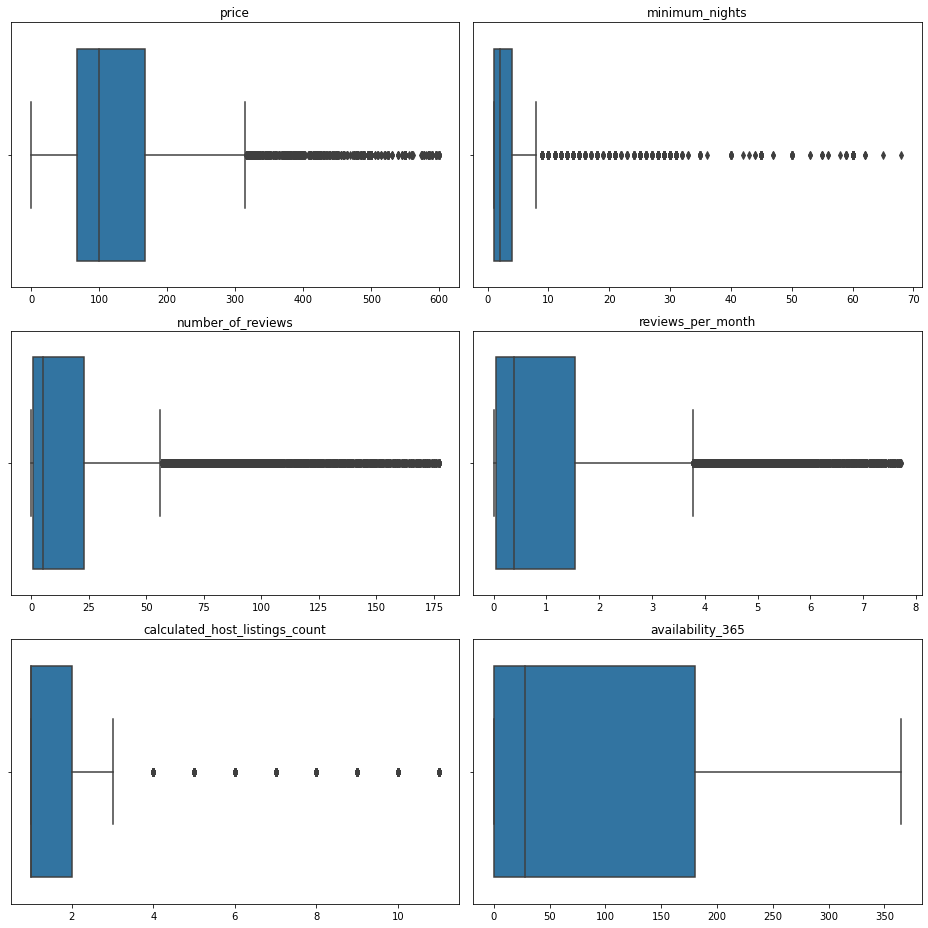

In [21]:
#plotting boxplots for all the continous columns after outlier handling:

plt.figure(figsize=([13,13]))

for i,col in enumerate(cont_cols):
    plt.subplot(3,2,i+1)
    sns.boxplot(df[col])
    plt.title(col)
    plt.xlabel("")
    plt.tight_layout()

In [22]:
#checking shape of the data after handling outliers:

df.shape

(43877, 14)

In [23]:
#Checking the head of the data:

df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
5,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129


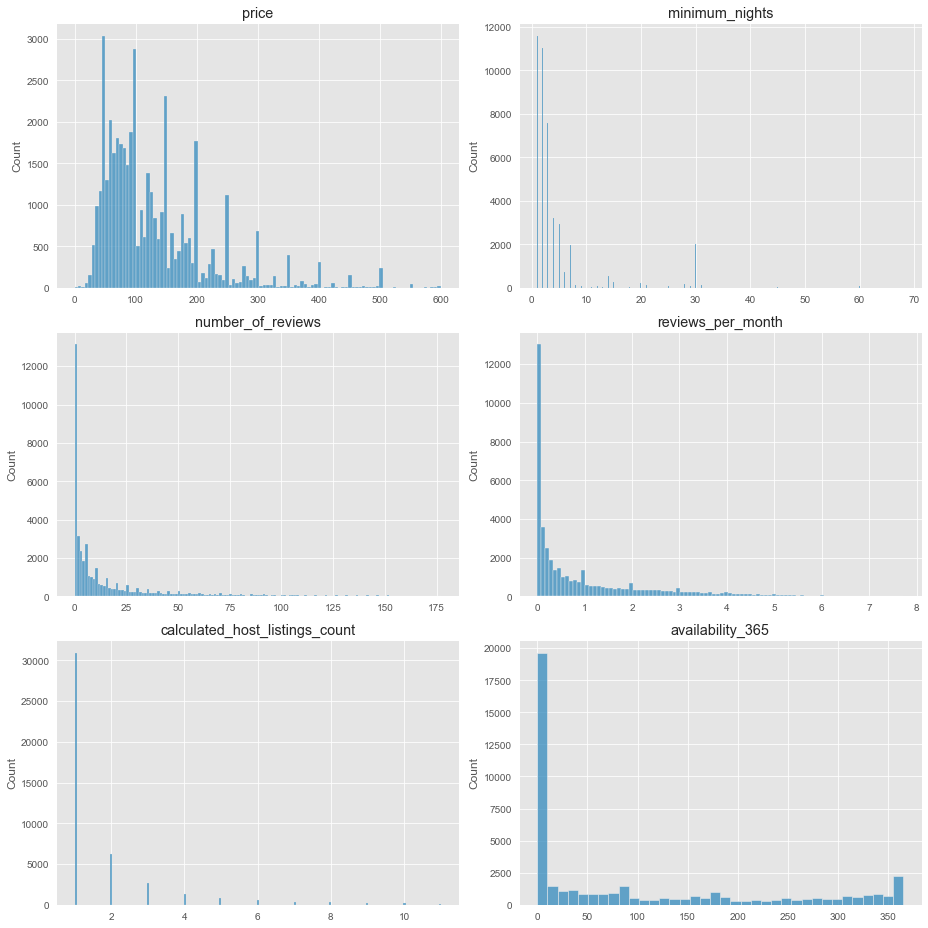

In [24]:
#plotting histogram for all the continous columns to see the distribution of the data:

sns.set_style("dark")
plt.style.use("ggplot")
plt.figure(figsize=([13,13]))

for i,col in enumerate(cont_cols):
    plt.subplot(3,2,i+1)
    sns.histplot(df[col])
    plt.title(col)
    plt.xlabel("")
    plt.tight_layout()

In [25]:
round(df.describe(percentiles=[0.60,0.70,0.80,0.90,0.95,0.99]),2)

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.387700e+04,43877.00,43877.00,43877.00,43877.00,43877.00,43877.00,43877.00,43877.00
mean,6.570273e+07,40.73,-73.95,130.93,4.94,20.13,1.04,1.71,99.13
std,7.742387e+07,0.06,0.05,90.58,7.61,32.64,1.40,1.56,125.39
min,2.438000e+03,40.50,-74.24,0.00,1.00,0.00,0.00,1.00,0.00
50%,3.010134e+07,40.72,-73.95,100.00,2.00,5.00,0.39,1.00,28.00
60%,4.685015e+07,40.73,-73.95,125.00,3.00,10.00,0.72,1.00,77.00
70%,7.618287e+07,40.76,-73.94,150.00,4.00,17.00,1.17,1.00,149.00
80%,1.315645e+08,40.77,-73.93,189.00,5.00,32.00,2.00,2.00,237.00
90%,2.055303e+08,40.81,-73.91,250.00,10.00,64.00,3.09,3.00,326.00
95%,2.419683e+08,40.83,-73.86,300.00,30.00,97.00,4.07,5.00,355.00


In [26]:
# Let's create bins for continuous column for easier analysis. Keeping the numeric values too for analysis. 

##price
df['price_type'] = pd.cut(df.price, 
                                  [0,100,200,1000], 
                                  labels=["Low", "Medium", "High"],
                                  include_lowest=True)

## minimum_nights
df["minimum_nights_range"] = pd.cut(df.minimum_nights, 
                                  [0,3,6,9,1000], 
                                  labels=["Less than 3", "4 to 6", "7 to 9", "10+"],
                                  include_lowest=True)

## number_of_reviews
df["number_of_reviews_range"] = pd.cut(df.number_of_reviews, 
                                                  [0,25,50,75,100,1000], 
                                                  labels=["0 to 25", "26 to 50", "51 to 75", "76 to 100","100+"],
                                                  include_lowest=True)

## reviews_per_month
df["reviews_per_month_range"] = pd.cut(df.reviews_per_month, 
                                                  [0,0.001,3,6,1000],
                                                  labels=["No Review", "Less than 3", "4 to 6", "6+"],
                                                  include_lowest=True)

## calculated_host_listings_range
df["calculated_host_listings_range"] = pd.cut(df.calculated_host_listings_count, 
                                                  [0,2,5,10,12], 
                                                  labels=["Less than 2", "2 to 5", "5 to 10", "10+"],
                                                  include_lowest=True)

## availability_365_range
df["availability_365_range"] = pd.cut(df.availability_365, 
                                                  [0,100,200,300,400], 
                                                  labels=["Less than 100", "100 to 200", "200 to 300", "300+"],
                                                  include_lowest=True)


#Checking the head of the data:
df.head(15)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_type,minimum_nights_range,number_of_reviews_range,reviews_per_month_range,calculated_host_listings_range,availability_365_range
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365,Medium,Less than 3,0 to 25,Less than 3,5 to 10,300+
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355,High,Less than 3,26 to 50,Less than 3,Less than 2,300+
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,Medium,Less than 3,0 to 25,No Review,Less than 2,300+
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0,Low,10+,0 to 25,Less than 3,Less than 2,Less than 100
5,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129,Medium,Less than 3,51 to 75,Less than 3,Less than 2,100 to 200
6,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0,Low,10+,26 to 50,Less than 3,Less than 2,Less than 100
8,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0,Low,Less than 3,100+,Less than 3,Less than 2,Less than 100
9,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188,Medium,Less than 3,100+,Less than 3,2 to 5,100 to 200
10,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,22-06-2019,0.43,1,6,Medium,4 to 6,51 to 75,Less than 3,Less than 2,Less than 100
12,9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,24-06-2019,1.34,3,314,Low,4 to 6,100+,Less than 3,2 to 5,300+


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43877 entries, 0 to 48894
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   host_id                         43877 non-null  int64   
 1   host_name                       43877 non-null  object  
 2   neighbourhood_group             43877 non-null  object  
 3   neighbourhood                   43877 non-null  object  
 4   latitude                        43877 non-null  float64 
 5   longitude                       43877 non-null  float64 
 6   room_type                       43877 non-null  object  
 7   price                           43877 non-null  int64   
 8   minimum_nights                  43877 non-null  int64   
 9   number_of_reviews               43877 non-null  int64   
 10  last_review                     35469 non-null  object  
 11  reviews_per_month               43877 non-null  float64 
 12  calculated_host_li

In [28]:
# Converting date to Pandas datetime format for extracting month and year:
df['last_review'] = pd.to_datetime(df['last_review'])


#Extracting month and year:
df['last_review_year']  = pd.DatetimeIndex(df['last_review']).year
df['last_review_month'] = pd.DatetimeIndex(df['last_review']).month

# Dropping the original last_review column:
df.drop('last_review', axis=1, inplace=True)

# Replacing the missing values with 'No Review'
df['last_review_year'] = df.last_review_year.fillna("No Review")
df['last_review_month'] = df.last_review_month.fillna("No Review")



In [29]:
#Checking the head of the data:

df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,calculated_host_listings_count,availability_365,price_type,minimum_nights_range,number_of_reviews_range,reviews_per_month_range,calculated_host_listings_range,availability_365_range,last_review_year,last_review_month
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,...,6,365,Medium,Less than 3,0 to 25,Less than 3,5 to 10,300+,2018.0,10.0
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,...,2,355,High,Less than 3,26 to 50,Less than 3,Less than 2,300+,2019.0,5.0
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,...,1,365,Medium,Less than 3,0 to 25,No Review,Less than 2,300+,No Review,No Review
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,...,1,0,Low,10+,0 to 25,Less than 3,Less than 2,Less than 100,2018.0,11.0
5,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,...,1,129,Medium,Less than 3,51 to 75,Less than 3,Less than 2,100 to 200,2019.0,6.0


In [30]:
#Adding newly created categorical columns to the cat_cols list:

cat_cols.extend(['price_type',
                 'minimum_nights_range',
                 'number_of_reviews_range',
                 'reviews_per_month_range',
                 'calculated_host_listings_range',
                 'availability_365_range',
                 'last_review_year',
                 'last_review_month'])

print(cat_cols)

['neighbourhood_group', 'room_type', 'price_type', 'minimum_nights_range', 'number_of_reviews_range', 'reviews_per_month_range', 'calculated_host_listings_range', 'availability_365_range', 'last_review_year', 'last_review_month']


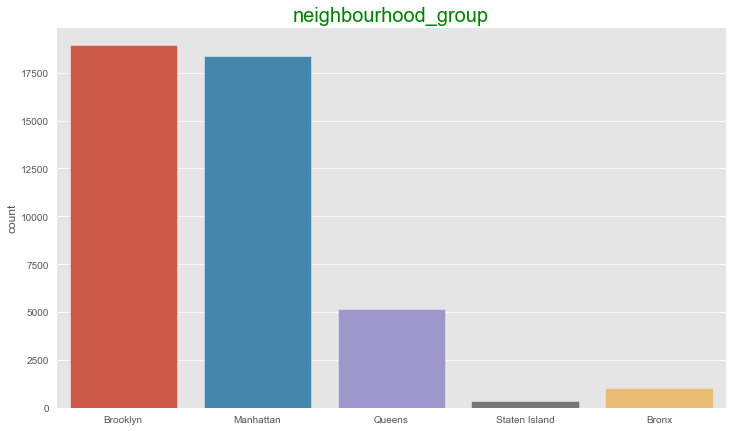

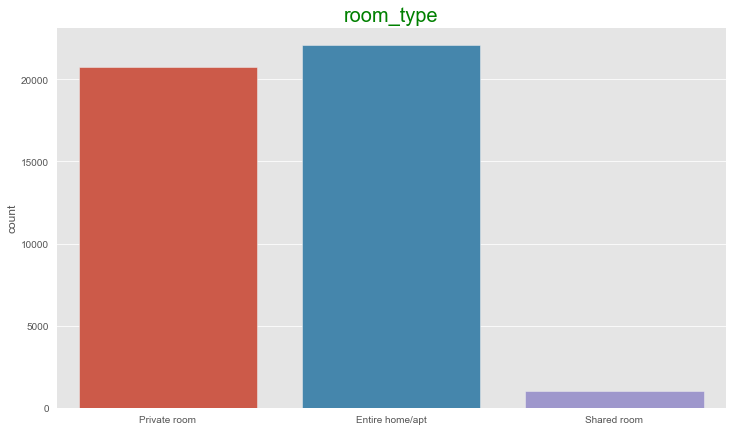

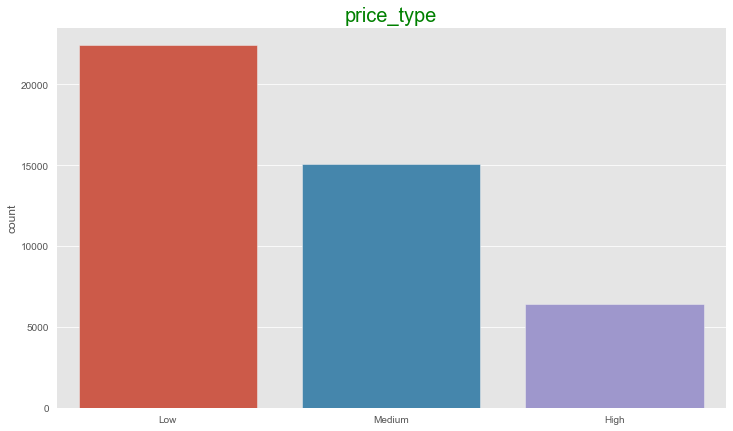

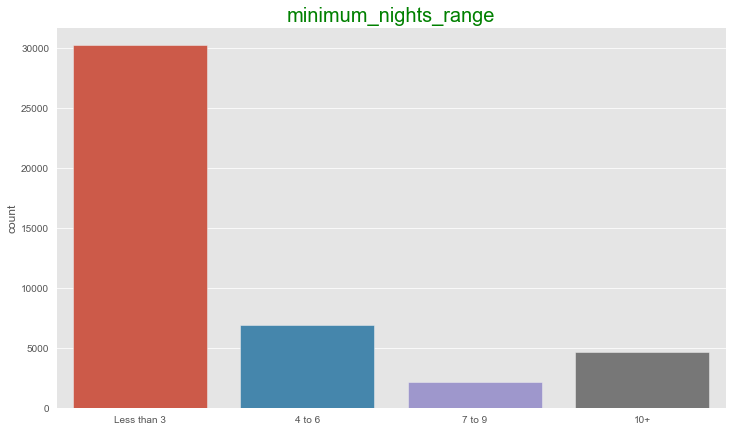

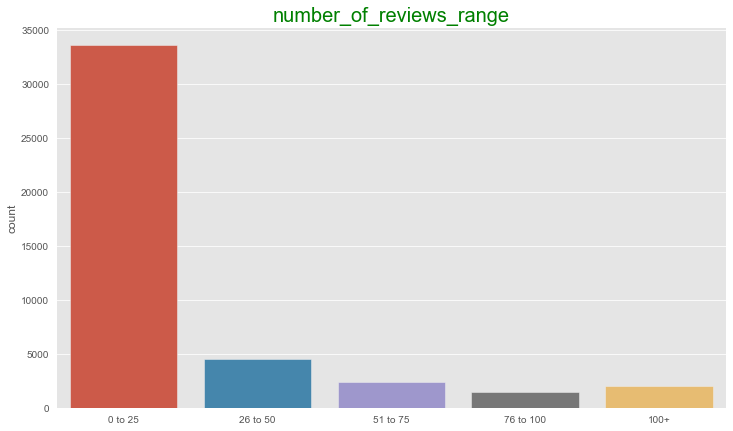

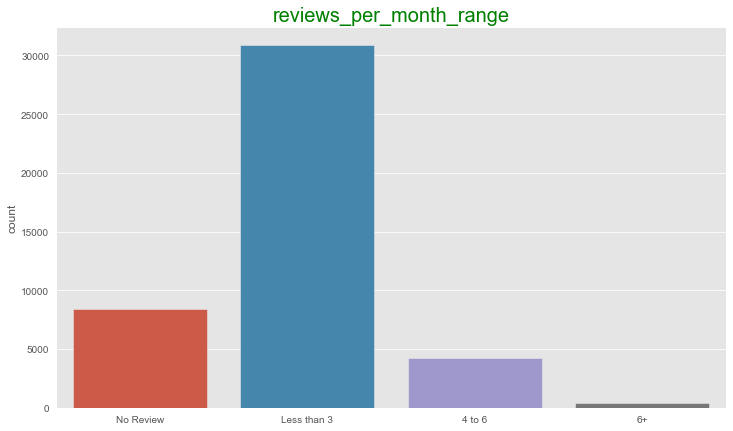

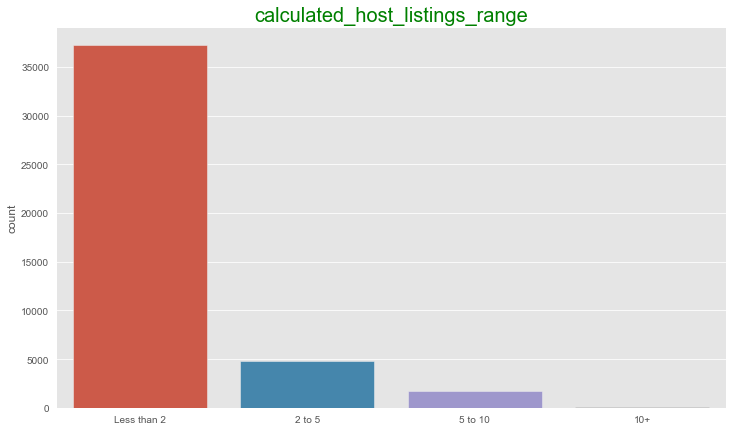

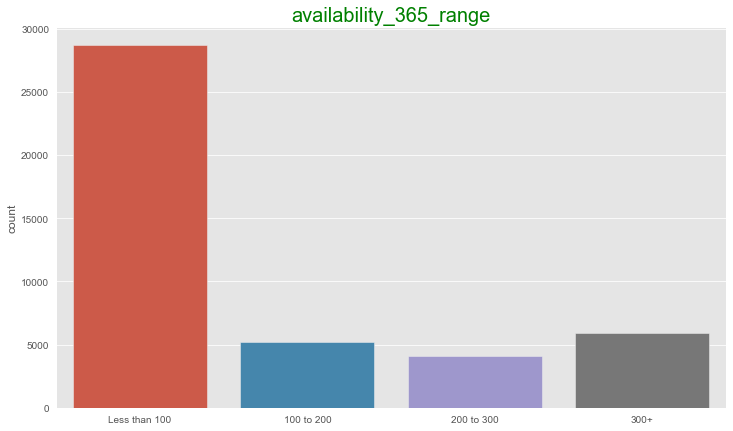

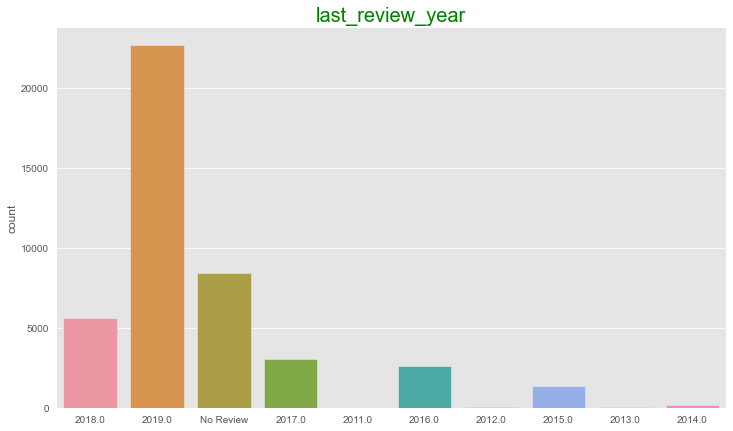

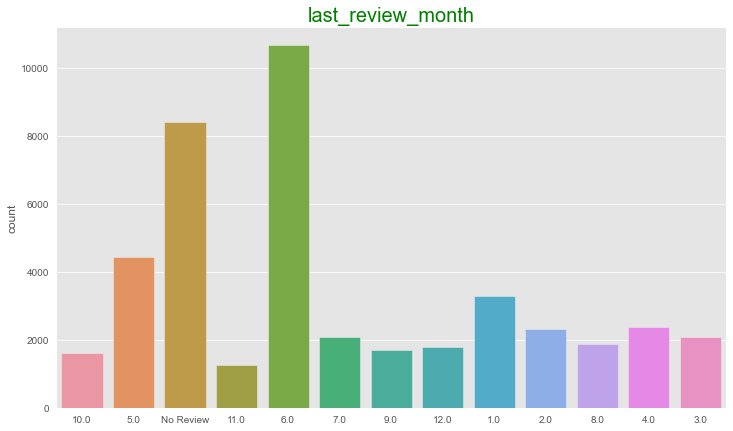

In [31]:
#Plotting count plot for all the categorical columns:

sns.set_style("dark")
plt.style.use("ggplot")


for col in cat_cols:
    plt.figure(figsize=([12,7]))
    sns.countplot(df[col])
    plt.title(col, fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
    plt.xlabel("")
    plt.show()

In [32]:
#Saving the file:

df.to_csv('AB_NYC_2019(Ver_2).csv',index=False)

#### Rest of the analysis will be done in Tableau.